# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 
1. Is the average subscription or non-subscription customer more profitable?
2. What are the busiest times and locations for use? Which areas do I need to ensure are properly stocked for daily commutes?
3. What is the average length of commute per city? Per neighborhood?
4. Who is my most popular demographic?
5. Does weather influence whether someone choose to use a bike-sharing service? By how much? Does it affect subscription vs non-subscription customers?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('\\')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\NYC-CitiBike-2016.csv',
              'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Chicago-Divvy-2016.csv',
              'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two. It also turns out that there are some trips in the New York city dataset that do not have an attached user type. Since we don't have enough information to fill these values in, just leave them as-is for now.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    if city == 'Washington':
        duration = float(datum['Duration (ms)']) / 60000
    else:
        duration = float(datum['tripduration']) / 60    
        
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    if city == "NYC":
        parsed_date = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M:%S')
    
    elif city =="Chicago":
        parsed_date = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')
    
    else:
        parsed_date = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M')
    
    month = int(parsed_date.month)
    hour = int(parsed_date.hour)
    day_of_week = parsed_date.strftime('%A')
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. NYC has some data points with a missing user type; you can leave
    these as they are (empty string).
    """
    if city == "Washington":
         user_type = datum['Member Type']
         if user_type == 'Registered':
             user_type = 'Subscriber'
         else:
             user_type = 'Customer'    
    else:
         user_type = datum['usertype']
     
    return user_type

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames, lineterminator='\n')
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in) 

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            month, hour, day_of_week = time_of_trip(row,city)
            new_point['duration'] = duration_in_mins(row,city)
            new_point['month'] = month
            new_point['hour'] = hour
            new_point['day_of_week'] = day_of_week
            new_point['user_type'] = type_of_user(row,city)

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': 'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Washington-CapitalBikeshare-2016.csv',
                            'out_file': 'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Washington-2016-Summary.csv'},
             'Chicago': {'in_file': 'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Chicago-Divvy-2016.csv',
                         'out_file': 'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Chicago-2016-Summary.csv'},
             'NYC': {'in_file': 'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\NYC-CitiBike-2016.csv',
                     'out_file': 'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: This city with the highest number of trips is New York City. The city with the highest proportion of trips made by subscribers is New York City, and the city with the highest proportion of trips made by short-term customers is Chicago.

### Process

The first thing I did was calculate the number trips made by subscribers and customers per city:

In [8]:
def number_of_trips(files):
    """
    This function calculates the amount of trips taken by city by user type,
    Takes a list of csv files (files) as input.    
    """
    #create dictionaries to store values
    subscribers_per_city = {}
    customers_per_city = {}
    
    for filename in files:
        with open(filename, 'r') as f_in:
            # set up csv reader object
            reader = csv.DictReader(f_in)

            # list the name of each city based on csv file name
            city = filename.split('-')[0].split('\\')[-1] 
            
            #initiate count variable
            subscribers_per_city[city] = 0
            customers_per_city[city] = 0
         
            for row in reader:                             
                
                if row['user_type'] == 'Subscriber':
                    subscribers_per_city[city] += 1    
                elif row['user_type'] == 'Customer':
                    customers_per_city[city] += 1
    
    return subscribers_per_city, customers_per_city

In [9]:
data_files = ['C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Chicago-2016-Summary.csv',
             'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\NYC-2016-Summary.csv',
             'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Washington-2016-Summary.csv']

#Unpacks tupples to make working with additional functions more manageable
subscriber_trips, customer_trips = number_of_trips(data_files)

Number of trips made by subscribers per city:

In [10]:
print(subscriber_trips)

{'Chicago': 54982, 'NYC': 245896, 'Washington': 51753}


Number of trips made by customers per city:

In [11]:
print(customer_trips)

{'Chicago': 17149, 'NYC': 30185, 'Washington': 14573}


From there, I created a function that computes the total amount of trips taken per city:

In [12]:
def total_trips_per_city(subscriber_trips, customer_trips):
    """
    This function calculates the amount of trips taken per city
    Takes subscriber_trips and customer_trips as input - calculated 
    as a result from number_of_trips function.
    """
    #Opted to use set with union to compare dict keys in the event that one of the dicts does not have results for a city
    trips_per_city = { k: subscriber_trips.get(k, 0) + customer_trips.get(k, 0) for k in set(subscriber_trips) | set(customer_trips) }
        
    return trips_per_city

trips_per_city = total_trips_per_city(subscriber_trips, customer_trips)

print(trips_per_city)

{'Washington': 66326, 'Chicago': 72131, 'NYC': 276081}


Then, I created a function to determine the city with the most trips:

In [13]:
def city_with_most_rides(trips_per_city):
    """
    This function returns the city where the most trips were taken.
    Takes trips_per_city as input - calculated as a result of the number_of_trips function.
    """
    city_with_most_trips = max(trips_per_city.items(), key = lambda x: x[1])
    
    return city_with_most_trips

city_with_most_trips = city_with_most_rides(trips_per_city)

print(city_with_most_trips)

('NYC', 276081)


Based on the previous calculations, I can now calculate the proportion of trips made by customers, and from there, determine the city with the highest proportion of customer trips:

In [14]:
def city_prop_subs(trips_per_city, subscriber_trips):
        """
        This function returns a dict with the proportion of trips taken by subscribers. 
        Takes as input:
        1. trips_per_city - calculated as a result from total_trips_per_city function.
        2. subscriber_trips - calculated as a result from number_of_trips function. 
        """
        
        proportion_trips_subscribers = { k: (subscriber_trips.get(k, 0) * 100) / trips_per_city.get(k, 0) for k in set(subscriber_trips) | set(trips_per_city) }
        
        return proportion_trips_subscribers

proportion_trips_subscribers = city_prop_subs(trips_per_city, subscriber_trips)

print(proportion_trips_subscribers)


{'Washington': 78.0282242257938, 'Chicago': 76.22520136973007, 'NYC': 89.06661450806104}


In [15]:
def city_with_highest_prop_subs(proportion_trips_subscribers):
    """
    This function returns the city where with the highest proportion of trips made by subscribers.
    Takes proportion_subscribers - calculated as a result of the city_prop_subs function.
    """
    city_trips_highest_prop_subs = max(proportion_trips_subscribers.items(), key = lambda x: x[1])
    
    return city_trips_highest_prop_subs

city_trips_highest_prop_subs = city_with_highest_prop_subs(proportion_trips_subscribers)

print(city_trips_highest_prop_subs)

('NYC', 89.06661450806104)


The same calcualtions can be performed for subscriber trips:

In [16]:
def city_prop_custs(trips_per_city, customer_trips):
        """
        This function returns a dict with the proportion of trips taken by subscribers. 
        Takes as input:
        1. trips_per_city - calculated as a result from total_trips_per_city function.
        2. customer_trips - calculated as a result from number_of_trips function. 
        """
        
        proportion_trips_customers = { k: (customer_trips.get(k, 0) * 100) / trips_per_city.get(k, 0) for k in set(customer_trips) | set(trips_per_city) }
        
        return proportion_trips_customers

proportion_trips_customers = city_prop_custs(trips_per_city, customer_trips)

print(proportion_trips_customers)

{'Washington': 21.971775774206193, 'Chicago': 23.774798630269924, 'NYC': 10.93338549193896}


In [17]:
def city_with_highest_prop_custs(proportion_trips_customers):
    """
    This function returns the city where with the highest proportion of trips made by customers.
    Takes proportion_customers - calculated as a result of the city_prop_subs function.
    """
    city_trips_highest_prop_custs = max(proportion_trips_customers.items(), key = lambda x: x[1])
    
    return city_trips_highest_prop_custs

city_trips_highest_prop_custs = city_with_highest_prop_subs(proportion_trips_customers)

print(city_trips_highest_prop_custs)

('Chicago', 23.774798630269924)


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 

The average trip lengths per city are:
    1. New York City: 15.8 minutes
    2. Chicago: 16.6 minutes
    3. Washington: 18.9 minutes

The proportion of trips longer than 30 minutes per city are:
    1. New York City: 7.32%
    2. Chicago: 8.35%
    3. Washington: 10.83%

#### Process for determining values:

I first created a list for all trip durations per city, and recalculated the number of trips. I chose to recalculate the number of trips due to New York having some empty values for customer type, which was the basis for my previous calculations.

In [18]:
def duration_and_trips(files):
    """
    This function is used to extract the duration values from csv files, and converts the 
    values from strings to floats. Takes a list of csv files(files) as input.
    Will recreate n_trips as for NYC, usertypes had missing values.
    """
    
    duration_list = []
    n_trips = {}
    
    for filename in files:
        with open(filename, 'r') as f_in:
            reader = csv.DictReader(f_in)
            
            city = filename.split('-')[0].split('\\')[-1]
            n_trips[city] = 0
            
            for row in reader:
                duration_list.append((city, float(row['duration'])))
                n_trips[city] += 1
                
    return duration_list, n_trips

In [19]:
data_files = ['C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Chicago-2016-Summary.csv',
             'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\NYC-2016-Summary.csv',
             'C:\\Users\\const\\OneDrive\\AnacondaProjects\\Udacity\\BikeShareAnalysis\\data\\Washington-2016-Summary.csv']


results = duration_and_trips(data_files)

duration_list = results[0]
n_trips = results[1]

#Tests to check that numbers are consistent
print(len(duration_list))
print(sum(n_trips.values()))
print(n_trips)

415255
415255
{'Chicago': 72131, 'NYC': 276798, 'Washington': 66326}


I then created a function to calculate the average trip length and the proportion of trips over 30 minutes.

In [20]:
def avg_trip_duration(duration_list, n_trips):
    """
    This function calculates the average duration of all trips per city. 
    Takes the duration_list and n_trips values from the duration_and_trips function.
    """
    sum_duration = {}

    for city, length in duration_list:
        
        if city not in sum_duration:
            sum_duration[city] = length
        else:
            sum_duration[city] += length
    
    avg_trip_length =  { k: sum_duration.get(k, 0) / n_trips.get(k, 0) for k in set(sum_duration) | set(n_trips) } 
    
    return avg_trip_length

avg_trip_length = avg_trip_duration(duration_list, n_trips)

print(avg_trip_length)

{'Washington': 18.93287355913721, 'Chicago': 16.563629368787335, 'NYC': 15.81259299802294}


In [21]:
def prop_trips_over_30_min(duration_list, n_trips):
    """
    This function calculates the proportion of trips over 30 minutes, represented as a percentage.
    Takes duration_list and n_trips, calculated from the duration_and_trips function, as inputs.
    """
    n_trips_over_30 = {}
    
    for city, length in duration_list:
        if city not in n_trips_over_30:
            if length >= 30:
                n_trips_over_30[city] = 1
        else:
            if length >= 30:
                n_trips_over_30[city] += 1
            
    prop_longer_trips = { k: n_trips_over_30.get(k, 0) * 100 / n_trips.get(k, 0) for k in set(n_trips_over_30) | set(n_trips) }
    
    return prop_longer_trips

percent_trips_over_30_min = prop_trips_over_30_min(duration_list, n_trips) 

print(percent_trips_over_30_min)

{'Washington': 10.83888671109369, 'Chicago': 8.34731252859381, 'NYC': 7.316888127804392}


I did notice that Washington had the most number of casual users, and also had the highest percentage of trips over 30 minutes. I am curious to see if there is a correlation!

**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: I chose to look at the city of Washington, but noted that within all cities,the average trip duration for subscribers was significantly shorter than for customers. In Washington, the average trip length for subscribers was 41.7 minutes, and for customers was 12.5. 

This could be because subscribers use the service regularly as a means of strict transportion, such as for their daily commute, whereas customers are using the service as an "experience" and spend more time leisurely biking. 

The difference between average trip durations for customers and subscribers are most extreme in the Bay Area where the average trip length for customers is five times as long as for customers. The least extreme is NYC, where the average trip duration for customer is only double the duration. A factor that influences this could be climate. 

In [22]:
def avg_trip_by_usertype(files):
    """
    This function is used to extract the duration and user_type values from a csv files, and converts the 
    values from strings to floats, and then calculate the average trip duration per usertype.
    Takes a list of csv files(files) as input.
    """
    
    duration_list = []

    for filename in files:
        with open(filename, 'r') as f_in:
            reader = csv.DictReader(f_in)
            
            city = filename.split('-')[0].split('\\')[-1]
            
            for row in reader:
                duration_list.append((city, row['user_type'], float(row['duration'])))
                           
    sum_duration = {}
    number_of_trips = {}
    
    for city, usertype, length in duration_list:
        if (city, usertype) not in sum_duration:
            sum_duration[(city, usertype)] = length
            number_of_trips[(city, usertype)] = 1
        else:
            sum_duration[(city, usertype)] += length
            number_of_trips[(city, usertype)] += 1
    
    mean_usertype_duration = { k: (sum_duration.get(k, 0) / number_of_trips.get(k, 0)) for k in set(sum_duration) | set(number_of_trips) }
    
    return mean_usertype_duration

mean_usertype_duration = avg_trip_by_usertype(data_files)

print(mean_usertype_duration)

{('NYC', 'Subscriber'): 13.680790523907177, ('Chicago', 'Subscriber'): 12.067201690250076, ('Washington', 'Subscriber'): 12.528120499294745, ('NYC', ''): 24.1013249651325, ('NYC', 'Customer'): 32.982004306775025, ('Chicago', 'Customer'): 30.979781133982506, ('Washington', 'Customer'): 41.67803139252976}


In [23]:
print(mean_usertype_duration['Washington','Customer'])
print(mean_usertype_duration['Washington','Subscriber'])

41.67803139252976
12.528120499294745


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

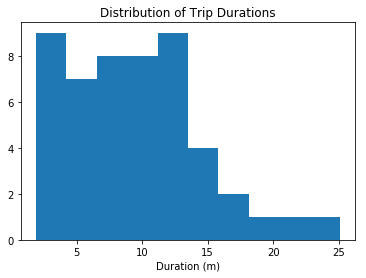

In [24]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [25]:
#Purpose: To collect all of the trip times as a list

def trip_times_list(files):
    """
    This function is used to extract the duration from the csv files, and converts the 
    values from strings to floats, and places them in a list.
    Takes a list of csv files(files) as input.
    """
    
    duration_list = []

    for filename in files:
        with open(filename, 'r') as f_in:
            reader = csv.DictReader(f_in)
            
            city = filename.split('-')[0].split('\\')[-1]
            
            for row in reader:
                duration_list.append((city, row['user_type'], float(row['duration'])))
                
    trip_duration = {}
    
    for city, usertype, length in duration_list:
        if (city, usertype) not in trip_duration:
            trip_duration[(city, usertype)] = [length]
        else:
            trip_duration[(city, usertype)].append(length)
    
    return trip_duration

trip_duration = trip_times_list(data_files)

Washington_trip_duration_list = trip_duration['Washington','Customer'] + trip_duration['Washington','Subscriber']
    
print(Washington_trip_duration_list[:4])

[16.912316666666666, 102.99918333333333, 9.66725, 12.8984]


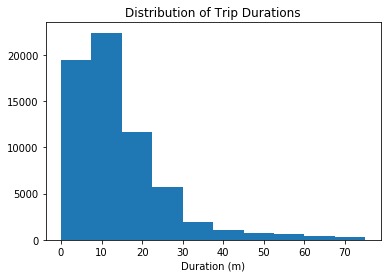

In [26]:
## and then use pyplot functions to generate a histogram of trip times.     ##

%matplotlib inline 

# example histogram, data taken from bay area sample
data = Washington_trip_duration_list

plt.hist(data, range=(0,75)) #omitted results greater than 75 minutes
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: For the Washington Customers group, the peak of the distribution is between 15 and minutes. For the Washington Subscribers group, it is between 5 and 10 minutes. For both groups, I would say that the histograms are right-skewed, with the Subscribers group being even more extreme. 

It is interesting to note that there are many more customers have a trip duration that is longer than the average duration as compared to the subscriber group. For the subscriber group, while there are extreme outliers which is causing the histogram to be very right-skewed, the majority of trips taken have a duration closer to the average. 

In [27]:
data_customers = trip_duration['Washington','Customer']
data_subscribers = trip_duration['Washington','Subscriber']


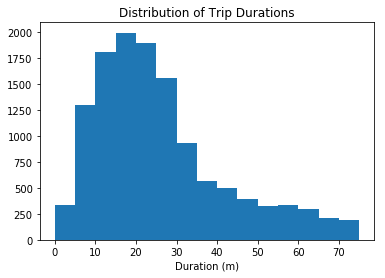

In [28]:
#Washington-Customers

plt.hist(data_customers, bins=15, range=(0,75)) #omitted results greater than 75 minutes
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

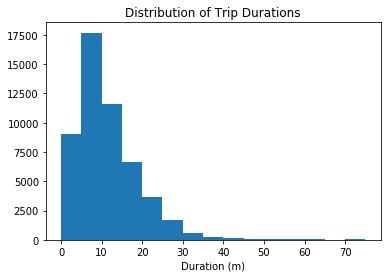

In [29]:
#Washington-Subscribers

plt.hist(data_subscribers, bins=15, range=(0,75)) #omitted results greater than 75 minutes
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: I chose to explore whether ridership differs by month and season. 

In [65]:
def ridership_by_month(files):
    """
    This function categorizes the number of trips taken per usertype per month. CSV files (files) are used as input.
    """
    trips_city_usertype_month = []
    
    for filename in files:
        with open(filename, 'r') as f_in:
            reader = csv.DictReader(f_in)
            
            city = filename.split('-')[0].split('\\')[-1]
            
            for row in reader:
                trips_city_usertype_month.append((city, row['user_type'], float(row['month'])))
                
    subscriber_trips_month = {}
    customer_trips_month = {}
        
    for city, usertype, month in trips_city_usertype_month:
        
        if city == 'Washington': #only includes results for Washington
            if usertype == 'Subscriber':
                if month not in subscriber_trips_month:
                    subscriber_trips_month[month] = 1
                else:
                    subscriber_trips_month[month] += 1
            else:
                if month not in customer_trips_month:
                    customer_trips_month[month] = 1
                else:
                    customer_trips_month[month] += 1
            
    return (subscriber_trips_month, customer_trips_month)

subscribers, customers = ridership_by_month(data_files)

customers = tuple(customers.items())
customers = sorted(customers, key=lambda month: month[0])
subscribers = tuple(subscribers.items())
subscribers = sorted(subscribers, key=lambda month: month[0])

print(customers)
print(subscribers)

[(1.0, 222), (2.0, 283), (3.0, 1188), (4.0, 1192), (5.0, 1248), (6.0, 1707), (7.0, 2186), (8.0, 1806), (9.0, 1674), (10.0, 1560), (11.0, 1075), (12.0, 432)]
[(1.0, 2212), (2.0, 2571), (3.0, 4383), (4.0, 4410), (5.0, 4520), (6.0, 5613), (7.0, 5155), (8.0, 5392), (9.0, 5204), (10.0, 5232), (11.0, 4139), (12.0, 2922)]


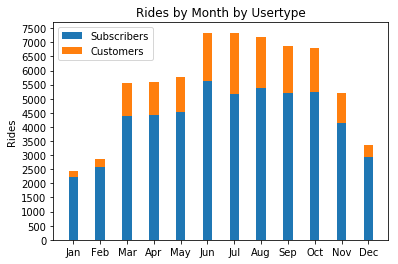

[90.87921117502054, 90.08409250175193, 78.67528271405493, 78.72188504105677, 78.36338418862691, 76.68032786885246, 70.22204059392453, 74.90969713809392, 75.66152951439372, 77.03180212014134, 79.38243191407749, 87.11985688729875]


In [78]:
import numpy as np

m = 12
months = np.arange(m)
sub = [s[1] for s in subscribers]  
cust = [c[1] for c in customers]
width = 0.35

sub_bar = plt.bar(months, sub, width)
cust_bar = plt.bar(months, cust, width, bottom=sub)

plt.ylabel('Rides')
plt.title('Rides by Month by Usertype')
plt.xticks(months, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.yticks(np.arange(0, 8000, 500))
plt.legend((sub_bar[0], cust_bar[0]),('Subscribers','Customers'))

plt.show()

proportion_sub = [sub[i] * 100 / (sub[i] + cust[i]) for i in range(len(sub))]

print(proportion_sub)

There are more rides taken between March and October. A drop is experienced as of November, with January being the month with the least amount of rides. This is to be expected due to the elements during the winter season.

The ratio between subscriber trips and customer trips narrows during the summer months, with the gab being narrowest during July. The months during the June and July have the highest ridership. Again, this makes sense given that more people are likely taking rides for pleasure as opposed to commutes during the summer months. 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I'm looking to implement analytics for software development - I would like to be able to evaluate market trends, potential revenue if we decide to go with one feature versus another, user experience, identifying customers that are at risk of leaving, revenue forecasting, competitive analysis... there is a lot that can be analyzed!

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.